## Predictive Insights for Reducing Customer Churn

### Overview

This a strategic initiative undertaken by SyriaTel, a prominent telecommunications company, to tackle the challenge of customer attrition. The main objective of this initiative is to uncover the intricate web of factors that contribute to customer churn and predict which subscribers are likely to discontinue their services. Armed with a wealth of customer data, ranging from demographics and subscription details to usage patterns and support interactions, SyriaTel is on a quest to unlock predictive insights. The ultimate goal is to empower SyriaTel with the ability to take proactive measures to retain at-risk customers and optimize their service offerings, thereby reducing revenue loss and enhancing overall customer satisfaction.

## Business Problem

### Stakeholder - SyriaTel Company

In a competitive telecom market, SyriaTel faces a critical business problem which is escalating customer churn rates, driven by undisclosed customer dissatisfaction and suboptimal service experiences. With an ever-expanding array of services and plans, the company is challenged to understand and predict why certain subscribers decide to leave. This surge in customer attrition not only impacts SyriaTel's revenue but also casts a shadow over its reputation. The business problem at hand is to proactively identify those customers at risk of churning by decoding the intricate blend of demographic, usage, and interaction data. SyriaTel aims to transform this challenge into an opportunity by deploying predictive insights to enhance customer retention, thereby securing a competitive edge in the telecommunications industry.

## Data Understanding

The dataset for the SyriaTel customer retention project comprises an array of features that offer insight into customer behavior and its impact on churn. These features include geographic indicators like state and area code, historical account length, communication preferences such as voicemail messages, and usage patterns during different times of the day (day and evening minutes, calls, and charges). International and nighttime usage metrics are also recorded, along with customer service interactions and the crucial 'Churn' variable, which signifies customer disengagement. By delving into this dataset, SyriaTel aims to uncover predictive insights that will enable them to proactively address churn and enhance customer retention, ultimately strengthening their position in the telecommunications industry.

In [1]:
# import the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import tree

In [2]:
# load the data
df = pd.read_csv("Data/Telecom.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## Data Visualization

In [5]:
# correlation between churn and other variables
df.corr()["churn"]

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

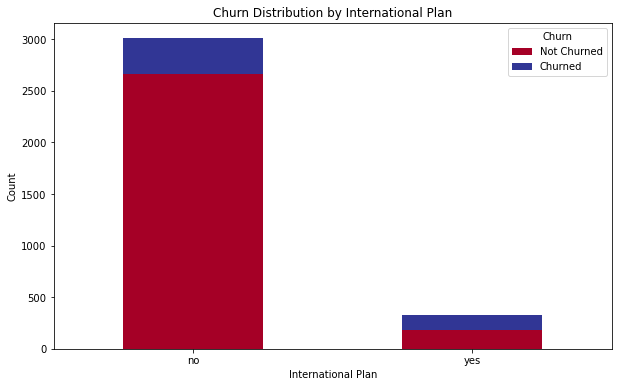

In [6]:
# Create a cross-tabulation of the variables
cross_tab = pd.crosstab(index=[df["international plan"]], columns=df["churn"])

# Plot the stacked bar chart
cross_tab.plot(kind="bar", stacked=True, colormap="RdYlBu", figsize=(10, 6))
plt.title("Churn Distribution by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Count")
plt.legend(["Not Churned", "Churned"], title="Churn")
plt.xticks(rotation=0)
plt.show()

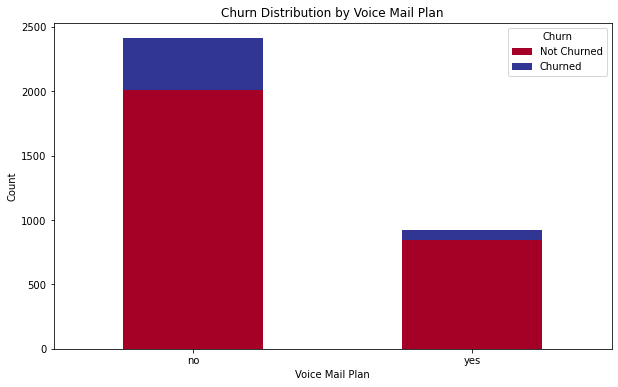

In [7]:
cross_tab = pd.crosstab(index=[df["voice mail plan"]], columns=df["churn"])

# Plot the stacked bar chart
cross_tab.plot(kind="bar", stacked=True, colormap="RdYlBu", figsize=(10, 6))
plt.title("Churn Distribution by Voice Mail Plan")
plt.xlabel("Voice Mail Plan")
plt.ylabel("Count")
plt.legend(["Not Churned", "Churned"], title="Churn")
plt.xticks(rotation=0)
plt.show()

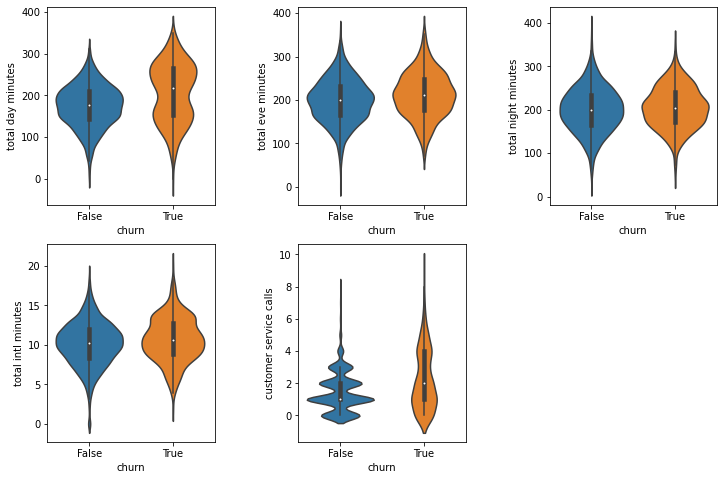

In [8]:
# Create subplots for violin plots
plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.5)

# Violin Plot for "total day minutes"
plt.subplot(231)
sns.violinplot(x="churn", y="total day minutes", data=df)

# Violin Plot for "total eve minutes"
plt.subplot(232)
sns.violinplot(x="churn", y="total eve minutes", data=df)

# Violin Plot for "total night minutes"
plt.subplot(233)
sns.violinplot(x="churn", y="total night minutes", data=df)

# Violin Plot for "total intl minutes"
plt.subplot(234)
sns.violinplot(x="churn", y="total intl minutes", data=df)

# Violin Plot for "customer service calls"
plt.subplot(235)
sns.violinplot(x="churn", y="customer service calls", data=df)

plt.show()

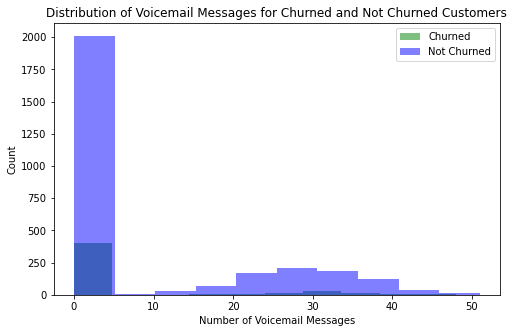

In [9]:
# Separate the data into churned and not churned
churned = df[df["churn"] == True]
not_churned = df[df["churn"] == False]

# Create histograms for churned and not churned customers
plt.figure(figsize=(8, 5))
plt.hist(churned["number vmail messages"], bins=10, alpha=0.5, label="Churned", color="green")
plt.hist(not_churned["number vmail messages"], bins=10, alpha=0.5, label="Not Churned", color="blue")
plt.xlabel("Number of Voicemail Messages")
plt.ylabel("Count")
plt.legend()
plt.title("Distribution of Voicemail Messages for Churned and Not Churned Customers")
plt.show()

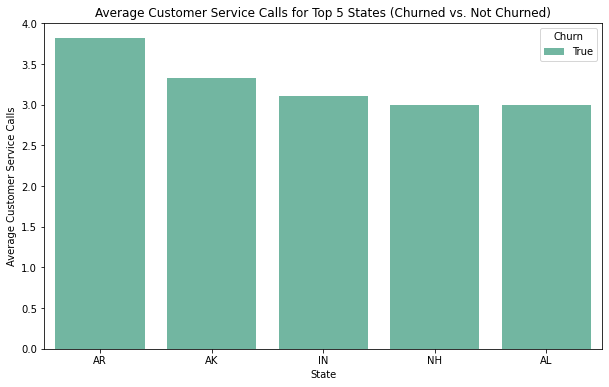

In [10]:
# Group the data by state and churn, calculate the average number of customer service calls
average_calls_by_state = df.groupby(["state", "churn"])["customer service calls"].mean().reset_index()

# Sort the states by average calls in descending order
average_calls_by_state = average_calls_by_state.sort_values(by="customer service calls", ascending=False)

# Select the top N states with the highest call averages
N = 5
top_states = average_calls_by_state.head(N)

# Create a bar plot showing the average customer service calls for the top N states
plt.figure(figsize=(10, 6))
sns.barplot(x="state", y="customer service calls", hue="churn", data=top_states, palette="Set2")
plt.title(f"Average Customer Service Calls for Top {N} States (Churned vs. Not Churned)")
plt.xlabel("State")
plt.ylabel("Average Customer Service Calls")
plt.legend(title="Churn", loc="upper right")
plt.show()

## Defining x and y

In [11]:
y = df["churn"]
X = df.drop("churn", axis=1)

## Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Dealing with Categorical Features

In [13]:
# create a copy of training data
X_train_copy = X_train.copy()

In [14]:
# Selecting categorical features, which include "international plan" and "voice mail plan",
# and creating a copy of these features in the training dataset.
categorical_features = ["international plan", "voice mail plan"]
X_train_categorical = X_train_copy[categorical_features].copy()
X_train_categorical

,international plan,voice mail plan
817,no,no
1373,no,no
679,yes,no
56,no,no
1993,no,no
...,...,...
1095,no,no
1130,no,no
1294,no,no
860,no,no


In [15]:
# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Fit the encoder on the training data
ohe.fit(X_train_categorical)

# Transform training set
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,no,yes,no,yes
817,1.0,0.0,1.0,0.0
1373,1.0,0.0,1.0,0.0
679,0.0,1.0,1.0,0.0
56,1.0,0.0,1.0,0.0
1993,1.0,0.0,1.0,0.0
...,...,...,...,...
1095,1.0,0.0,1.0,0.0
1130,1.0,0.0,1.0,0.0
1294,1.0,0.0,1.0,0.0
860,1.0,0.0,1.0,0.0


## Dealing with Numerical Features

In [16]:
# Selecting numerical features for further processing in the training dataset.
numerical_features = ["number vmail messages", "total day minutes", "total day calls",
                      "total day charge", "customer service calls"]
X_train_numerical = X_train_copy[numerical_features].copy()
X_train_numerical

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls
817,0,95.5,92,16.24,2
1373,0,112.0,105,19.04,4
679,0,222.4,78,37.81,1
56,0,126.9,98,21.57,1
1993,0,216.3,96,36.77,0
...,...,...,...,...,...
1095,0,274.4,120,46.65,1
1130,0,35.1,62,5.97,1
1294,0,87.6,76,14.89,1
860,0,179.2,111,30.46,2


In [17]:
# Instantiate a MinMaxScaler to normalize numerical features
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train_numerical)

# Transform training set
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numerical),
    index=X_train_numerical.index,
    columns=X_train_numerical.columns
)
X_train_scaled

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls
817,0.000000,0.266801,0.459259,0.266892,0.222222
1373,0.000000,0.314187,0.555556,0.314189,0.444444
679,0.000000,0.631246,0.355556,0.631250,0.111111
56,0.000000,0.356979,0.503704,0.356926,0.111111
1993,0.000000,0.613728,0.488889,0.613682,0.000000
...,...,...,...,...,...
1095,0.000000,0.780586,0.666667,0.780574,0.111111
1130,0.000000,0.093337,0.237037,0.093412,0.111111
1294,0.000000,0.244113,0.340741,0.244088,0.111111
860,0.000000,0.507180,0.600000,0.507095,0.222222


In [18]:
# Concatenate the scaled numerical features and one-hot encoded categorical features to create the full training dataset.
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls,no,yes,no,yes
817,0.000000,0.266801,0.459259,0.266892,0.222222,1.0,0.0,1.0,0.0
1373,0.000000,0.314187,0.555556,0.314189,0.444444,1.0,0.0,1.0,0.0
679,0.000000,0.631246,0.355556,0.631250,0.111111,0.0,1.0,1.0,0.0
56,0.000000,0.356979,0.503704,0.356926,0.111111,1.0,0.0,1.0,0.0
1993,0.000000,0.613728,0.488889,0.613682,0.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.780586,0.666667,0.780574,0.111111,1.0,0.0,1.0,0.0
1130,0.000000,0.093337,0.237037,0.093412,0.111111,1.0,0.0,1.0,0.0
1294,0.000000,0.244113,0.340741,0.244088,0.111111,1.0,0.0,1.0,0.0
860,0.000000,0.507180,0.600000,0.507095,0.222222,1.0,0.0,1.0,0.0


## Fitting a Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')

# Fit the logistic regression model to the full training dataset 
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, solver='liblinear')

## Performance on Training Data

In [20]:
# Predict churn values on the training data
y_hat_train = logreg.predict(X_train_full)

# Calculate the residuals for the actual and predicted churn values.
train_residuals = np.abs(y_train ^ y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

False    2287
True      379
Name: Residuals (counts), dtype: int64

False    0.857839
True     0.142161
Name: Residuals (proportions), dtype: float64


Not bad; our classifier was about 86% correct on our training data!

## Performance on Test Data

In [21]:
# Copy the test data for preprocessing.
X_test_copy = X_test.copy()

# Extract and preprocess categorical features for the test set, applying One-Hot Encoding.
X_test_categorical = X_test_copy[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

# Extract and normalize numerical features for the test set.
X_test_numerical = X_test_copy[numerical_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numerical),
    index=X_test_numerical.index,
    columns=X_test_numerical.columns
)

# Concatenate the preprocessed categorical and numeric data to create the test data.
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,number vmail messages,total day minutes,total day calls,total day charge,customer service calls,no,yes,no,yes
438,0.000000,0.437679,0.466667,0.437669,0.111111,1.0,0.0,1.0,0.0
2674,0.000000,0.305859,0.644444,0.305912,0.000000,1.0,0.0,1.0,0.0
1345,0.000000,-0.007467,-0.222222,-0.007432,0.444444,1.0,0.0,1.0,0.0
1957,0.000000,0.603676,0.362963,0.603716,0.111111,1.0,0.0,1.0,0.0
2148,0.000000,0.406088,0.533333,0.406081,0.111111,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2577,0.000000,0.524124,0.459259,0.524155,0.222222,1.0,0.0,1.0,0.0
2763,0.372549,0.439690,0.548148,0.439696,0.333333,1.0,0.0,0.0,1.0
3069,0.509804,0.448306,0.451852,0.448311,0.111111,1.0,0.0,0.0,1.0
1468,0.529412,0.329983,0.533333,0.330068,0.333333,1.0,0.0,0.0,1.0


In [22]:
# Predict churn values on the testing data
y_hat_test = logreg.predict(X_test_full)

# Calculate the residuals for the actual and predicted churn values.
test_residuals = np.abs(y_test ^ y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

False    566
True     101
Name: Residuals (counts), dtype: int64

False    0.848576
True     0.151424
Name: Residuals (proportions), dtype: float64


And still about 85% accurate on our test data!

## Evaluating the Logistic Regression Model

In [23]:
# Output evaluation results for the non-balanced logistic regression model
print("Non-Balanced Logistic Regression Evaluation Metrics:")
print('Testing_1 Precision: ', precision_score(y_test, y_hat_test))
print('Testing_1 Recall: ', recall_score(y_test, y_hat_test))
print('Testing_1 Accuracy: ', accuracy_score(y_test, y_hat_test))
print('Testing_1 F1-Score: ', f1_score(y_test, y_hat_test))
print('Testing_1 ROC AUC Score: ', roc_auc_score(y_test, model_log.decision_function(X_test_full)))

Non-Balanced Logistic Regression Evaluation Metrics:
Testing_1 Precision:  0.5
Testing_1 Recall:  0.15841584158415842
Testing_1 Accuracy:  0.848575712143928
Testing_1 F1-Score:  0.24060150375939848
Testing_1 ROC AUC Score:  0.8158170940768988


In [24]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.57


The model's precision on both the training and testing datasets is relatively low. This indicates that a substantial number of the positive predictions made by the model are incorrect or false positives. 

The recall scores for both training and testing data are also quite low. This means that the model is not effectively capturing a significant portion of the actual positive cases. It misses many positive instances, leading to a high number of false negatives.

Accuracy, while relatively high, can be misleading. It's important to consider that a high accuracy score may be due to class imbalance, especially if one class significantly outweighs the other. This metric alone might not accurately represent the model's performance.

The F1-score is a balance between precision and recall and takes into account the trade-off between false positives and false negatives. Both the training and testing F1-scores are relatively low, indicating that there's room for improvement in balancing precision and recall.

An AUC of 0.57 suggests that the model's performance in distinguishing between the two classes is only slightly better than random chance. In other words, the model's predictions are not highly reliable or effective at classifying instances.

The ROC AUC Score of approximately 0.8158 (for the testing data) indicates that the model demonstrates reasonably good discriminatory power in distinguishing between positive and negative classes. This suggests that this model can effectively separate cases of churn (positive) from non-churn (negative) customers.This model generalizes well to new, unseen data, as indicated by the consistency of performance between the training and testing sets, providing confidence in its real-world applicability.

In [25]:
from sklearn.preprocessing import StandardScaler

# Scale and normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

In [26]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [27]:
from sklearn.model_selection import GridSearchCV

# Create a hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Create the logistic regression model
log_reg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.001, solver='liblinear')

In [28]:
# Predict on the testing set
y_pred = best_logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_logreg.predict_proba(X_test_scaled)[:, 1])

# Output evaluation results for the balanced logistic regression model
print("Balanced Logistic Regression Evaluation Metrics:")
print("Testing_2 Accuracy:", accuracy)
print("Testing_2 Precision:", precision)
print("Testing_2 Recall:", recall)
print("Testing_2 F1 Score:", f1)
print("Testing_2 ROC AUC:", roc_auc)

Balanced Logistic Regression Evaluation Metrics:
Testing_2 Accuracy: 0.7271364317841079
Testing_2 Precision: 0.3333333333333333
Testing_2 Recall: 0.801980198019802
Testing_2 F1 Score: 0.4709302325581396
Testing_2 ROC AUC: 0.8109715565196095


In comparing the two testing datasets, it becomes evident that they embody a fundamental trade-off between precision and recall. Testing Set 1 shines with higher accuracy and precision, making it a preferable choice when minimizing false positives. With its ability to deliver more reliable positive predictions, this set proves effective for scenarios where precision is a top priority. In contrast, Testing Set 2 excels in recall, capturing a larger proportion of true positive cases. It is the ideal choice when correctly identifying positive cases as it takes precedence, even if it results in more false positives. Both datasets exhibit commendable ROC AUC scores, indicating their capacity to effectively discriminate between positive and negative cases.

## Training the Decision Tree

In [29]:
# Create the classifier and fit it on the training data
clf = DecisionTreeClassifier(criterion='entropy', random_state=10)

clf.fit(X_train_full, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [30]:
# Make predictions for test data
y_pred = clf.predict(X_test_full)

In [31]:
# Evaluate on the testing set
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)
roc_auc_test = roc_auc_score(y_test, clf.predict_proba(X_test_full)[:, 1])

# Output evaluation results for the non-balanced decision tree model
print("Non-Balanced Decision Tree Evaluation Metrics:")
print("Testing Accuracy:", accuracy_test)
print("Testing Precision:", precision_test)
print("Testing Recall:", recall_test)
print("Testing F1 Score:", f1_test)
print("Testing ROC AUC:", roc_auc_test)

Non-Balanced Decision Tree Evaluation Metrics:
Testing Accuracy: 0.8275862068965517
Testing Precision: 0.4166666666666667
Testing Recall: 0.3465346534653465
Testing F1 Score: 0.3783783783783784
Testing ROC AUC: 0.629403841444215


The model exhibits good overall correctness in its predictions on the testing data, correctly classifying approximately 82.76% of cases. However, accuracy alone may not be sufficient to evaluate this model, especially as the dataset is imbalanced. 

The precision score of approximately 41.67% indicates that the model correctly identifies a relatively low percentage of true churn cases among its positive predictions. 

The recall score of about 34.65% suggests that the model correctly identifies a modest percentage of true churn cases out of all actual churn cases. Improving recall is important to reduce the number of false negatives.

The F1 score, which balances precision and recall, is approximately 37.84%. This indicates that there is a trade-off between precision and recall, and achieving a better balance between the two is desirable.

The ROC AUC score of around 62.94% suggests moderate discrimination ability. The model can differentiate to some extent between churn and non-churn customers, but there is potential for improvement in this aspect.

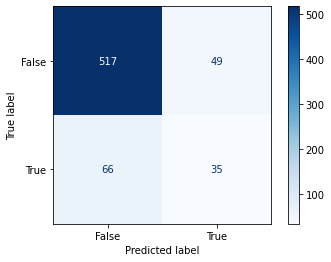

In [32]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)

In [33]:
# Create a Decision Tree classifier with balanced class weights to address class imbalance.
balanced_tree = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', random_state=10)

# Fit the Decision Tree model
balanced_tree.fit(X_train_full, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=10)

In [34]:
# Make predictions for the test data using the balanced decision tree model
y_balanced_tree_pred = balanced_tree.predict(X_test_full)

# Calculate evaluation metrics for the balanced decision tree model
accuracy_balanced_tree = accuracy_score(y_test, y_balanced_tree_pred)
precision_balanced_tree = precision_score(y_test, y_balanced_tree_pred)
recall_balanced_tree = recall_score(y_test, y_balanced_tree_pred)
f1_balanced_tree = f1_score(y_test, y_balanced_tree_pred)
roc_auc_balanced_tree = roc_auc_score(y_test, balanced_tree.predict_proba(X_test_full)[:, 1])

# Output evaluation results for the balanced decision tree model
print("Balanced Decision Tree Evaluation Metrics:")
print("Testing Accuracy:", accuracy_balanced_tree)
print("Testing Precision:", precision_balanced_tree)
print("Testing Recall:", recall_balanced_tree)
print("Testing F1 Score:", f1_balanced_tree)
print("Testing ROC AUC:", roc_auc_balanced_tree)

Balanced Decision Tree Evaluation Metrics:
Testing Accuracy: 0.8305847076461769
Testing Precision: 0.43023255813953487
Testing Recall: 0.36633663366336633
Testing F1 Score: 0.39572192513368987
Testing ROC AUC: 0.6402057166847427


The balanced decision tree shows a higher recall (0.3663) compared to the non-balanced decision tree (0.3465). This indicates that the balanced model is better at capturing true positive cases, which is essential in reducing false negatives.

The balanced decision tree exhibited better precision (0.4302) compared to the non-balanced decision tree (0.4167). This means that when the balanced model predicts the positive class, it is correct more often, reducing the rate of false positives.

The balanced decision tree's F1 score (0.3957) was slightly higher than that of the non-balanced decision tree (0.3784). The F1 score provides a balanced measure of precision and recall, and the balanced model achieved a better balance between these two metrics.

The non-balanced decision tree had a slightly higher accuracy (0.8276) compared to the balanced decision tree (0.8306). However, accuracy alone can be misleading, especially in imbalanced datasets, as it may not reflect the model's ability to handle minority class cases.

The balanced decision tree exhibited a higher ROC AUC score (0.6402) compared to the non-balanced decision tree (0.6294). This suggests that the balanced model has a better ability to discriminate between the two classes.

## Training a Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 decision trees.
rf = RandomForestClassifier(n_estimators=100, random_state=10)

# Fit the Random Forest model using the preprocessed training data.
rf.fit(X_train_full, y_train)

RandomForestClassifier(random_state=10)

In [36]:
# make predictions for the RandomForest
y_rf_pred = rf.predict(X_test_full)

accuracy_rf = accuracy_score(y_test, y_rf_pred)
precision_rf = precision_score(y_test, y_rf_pred)
recall_rf = recall_score(y_test, y_rf_pred)
f1_rf = f1_score(y_test, y_rf_pred)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_full)[:, 1])

# Output evaluation results for the Random Forest model
print("Testing Accuracy:", accuracy_rf)
print("Testing Precision:", precision_rf)
print("Testing Recall:", recall_rf)
print("Testing F1 Score:", f1_rf)
print("Testing ROC AUC:", roc_auc_rf)

Testing Accuracy: 0.8740629685157422
Testing Precision: 0.6268656716417911
Testing Recall: 0.4158415841584158
Testing F1 Score: 0.5
Testing ROC AUC: 0.8616135465136618


The Random Forest model outperforms the non-balanced Decision Tree in terms of accuracy, achieving an accuracy of 0.8741 compared to the Decision Tree's accuracy of 0.8276. This indicates that the Random Forest correctly classifies a higher percentage of samples in the testing data.

The Random Forest model demonstrates better precision, with a precision score of 0.6269, compared to the non-balanced Decision Tree's precision score of 0.4167. This means that the Random Forest's positive predictions are correct more often.

Both models have relatively balanced recall scores, which means they trade off well between minimizing false negatives and capturing true positives. The non-balanced Decision Tree achieves a slightly higher recall.

The Random Forest model attains a higher F1 score of 0.5000, indicating a better balance between precision and recall. The non-balanced Decision Tree has an F1 score of 0.3784.

The Random Forest model demonstrates significantly better discrimination between the two classes, as indicated by the higher ROC AUC score (0.8616) compared to the Decision Tree (0.6294).

## Comparing the Models

The Random Forest model outperforms all the other models in terms of accuracy, precision, and F1 score, achieving the highest accuracy of 87.41%. It demonstrates the best balance between precision and recall (F1 score) at 50.00%.

The Balanced Decision Tree model, although not as strong as Random Forest, still provides an improvement over the non-balanced Decision Tree. It achieves an accuracy of 83.06% and a balanced F1 score of 39.57%.

The Non-Balanced Decision Tree model performs moderately well but struggles with capturing actual churn cases. It has a lower recall and a lower F1 score compared to the balanced decision tree.

The Balanced Logistic Regression model with SMOTE oversampling shows improved recall but sacrifices precision. It may be suitable when higher recall is desired.

The Non-Balanced Logistic Regression model performs the weakest in terms of recall and F1 score

The Random Forest model is the best performer among the models tested, offering a good balance of accuracy and recall. It is recommended for use in predicting customer churn in the competitive telecom market that SyriaTel faces.

## Conclusion

1. Key Churn Factors:

The analysis of the dataset columns reveals that several factors play a crucial role in understanding customer churn within SyriaTel.
"Number vmail messages" and "customer service calls" emerge as critical indicators of potential churn, suggesting that customer dissatisfaction and interactions with customer service significantly influence attrition.

2. Usage Patterns Impact Churn:

Features such as "total day minutes," "total day calls," and "total day charge" provide insights into customer usage patterns. High usage, especially in daytime, may lead to increased billing and dissatisfaction, contributing to churn.

3. Plan Choices Matter:

The availability of "international plan" and "voice mail plan" as binary features signifies that customers' plan choices can have a notable impact on churn.

## Recommendations

1. Customer-Centric Approach:

To mitigate the challenge of escalating churn rates, SyriaTel should adopt a customer-centric approach.
Focus on customer satisfaction, especially for those with a high number of "customer service calls." Provide prompt and effective solutions to address their concerns.

2. Transparency and Communication:

Enhance billing transparency and communication for customers with high "total day minutes," "total day calls," and "total day charge." This can help manage expectations and reduce dissatisfaction.

3. Plan Customization:

Enable customers to customize their plans, especially with respect to "international plan" and "voice mail plan." Providing flexibility can help align services with individual preferences, reducing the likelihood of churn.

4. Monitoring and Predictive Insights:

Continuously monitor the specified features and usage patterns to identify early signs of dissatisfaction and churn.
Implement predictive churn models based on these features. Machine learning models like logistic regression, decision trees, and Random Forest can help SyriaTel anticipate potential churn and take proactive measures to retain at-risk customers.

5. Feedback Mechanism:

Establish a feedback mechanism to collect input from customers who exhibit characteristics associated with churn. This feedback can be invaluable in pinpointing specific areas of dissatisfaction and driving targeted improvements.

6. Strategic Decision-Making:

Use the insights from the dataset and predictive models to inform strategic decision-making. Optimize service offerings, align marketing strategies, and ensure SyriaTel remains competitive in the telecommunications industry.